## Section 2.2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv("https://raw.githubusercontent.com/Kuntal-G/Machine-Learning/master/R-machine-learning/data/banknote-authentication.csv")


X = dataset.drop(['class'], axis=1).values

y = dataset['class'].values

y = y.reshape(y.shape[0],1)

def define_parameters(n_weights):
    w = np.random.randn( n_weights, 1)
    b = np.random.randn()
    
    return w, b

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

def predictions(w, b, X):
    XW = np.dot(X,w) + b
    z = sigmoid(XW)
    return z

def find_cost(z,y):
    m = y.shape[0]
    total_cost = (1/m) * np.sum(np.square(z - y))
    return total_cost

def find_derivatives(X,y,z):
    m = y.shape[0]
    dcost_dpred = (1/m)*(z-y)
    dpred_dz = sigmoid_der(z)
    z_delta = dcost_dpred * dpred_dz
    dz_dw = X.T
    dw = np.dot( dz_dw , z_delta)
    db = np.sum(z_delta)
    
    return dw, db


def update_weights(w,b,dw,db,lr):
    w = w - lr * dw
    b = b - lr * db
    
    return w, b

def multi_logistic_regression(X, y, lr, epochs):
    error_list = []
    lenw = X.shape[1]
    w,b = define_parameters(lenw)
    for i in range(epochs):
        z = predictions(w, b, X)
        cost = find_cost(z, y)
        error_list.append(cost)
        dw, db = find_derivatives (X,y,z)
        w, b = update_weights(w, b, dw, db,  lr )
        if i % 50 == 0 :
            print(cost)

            
    return w, b, error_list



lr = 0.05
epochs = 2000
w, b, error_list = multi_logistic_regression(X,y,lr,epochs)




0.39079665797943763
0.2222334940410439
0.11984361094462588
0.08798181906919457
0.07426986105697198
0.06584523035229246
0.05981809584178409
0.055167437141959944
0.0514084781327243
0.048271767704097676
0.04559253370969552
0.043263101650851184
0.041209485592238373
0.039378781021005255
0.03773190587768858
0.03623919496089323
0.03487760808098697
0.03362889539749175
0.03247835370272752
0.03141396029104727
0.030425755397169435
0.029505392616344904
0.028645805510371963
0.02784095625297655
0.02708564328695312
0.026375352143770823
0.02570613831411776
0.02507453424805227
0.024477474751043792
0.02391223656745818
0.023376389022841945
0.0228677533715714
0.022384369060206372
0.021924465531811987
0.02148643850528243
0.0210688298958485
0.02067031071916968
0.020289666456378752
0.019925784461689713
0.01957764307532914


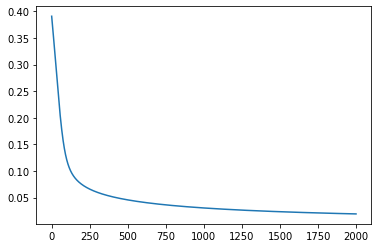

In [2]:
plt.plot(error_list)



In [3]:
z = predictions(w, b, X)

y_pred = []
for i in z:
    if i > 5.0:
        y_pred.append(1)
    else:
        y_pred.append(0)
    
y_true = sum(y.tolist() , [])   

correct = 0
for i in y_true :
    if y[i] == y_pred[i]:
        correct = correct + 1

print("Accuracy: " + str(correct/len(y_true) * 100))

Accuracy: 100.0
